In [169]:
import numpy as np
import matplotlib.pyplot as plt
import arrow
import datetime as dt
import xarray as xr
import os
import cmocean.cm as cm
import matplotlib.cm as cma
import scipy.interpolate as interp
from matplotlib.collections import PatchCollection
import matplotlib.dates as mpl_dates
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FormatStrFormatter
import datetime as dt
import pandas as pd
import matplotlib.dates as mpl_dates
import scipy.stats as stats
from matplotlib.ticker import StrMethodFormatter 
from matplotlib.colors import LogNorm

## Import data

In [170]:
data = xr.open_dataset('/ocean/cstang/MOAD/analysis-camryn/Ariane/for_jan18/for_straight_01jan18_s7t28/ariane_positions_quantitative.nc')
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')

In [171]:
# Import Haro data
## PR to VS

# Full
prtovs_haro_avg_df = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/Ariane/combined2timeseries/PRtovs18_21_haro_avg.csv')
datelist_prtovs_haro_avg = pd.to_datetime(prtovs_haro_avg_df['Date'])
prtovs_haro_avg = pd.DataFrame({'Transport':prtovs_haro_avg_df['Transport'].values},index=datelist_prtovs_haro_avg)['Transport']

# #Only 2017
PRtovs2017_haro_avg_df = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/Ariane/combined2timeseries/PRtovs2017_haro_avg.csv')
datelist_prtovs_haro2017 = pd.to_datetime(PRtovs2017_haro_avg_df['Date'])
PRtovs2017_haro_avg = pd.DataFrame({'Transport':PRtovs2017_haro_avg_df['Transport'].values},index=datelist_prtovs_haro2017)['Transport']

# #Only 2018
PRtovs2018_haro_avg_df = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/Ariane/combined2timeseries/PRtovs2018_haro_avg.csv')
datelist_prtovs_haro2018 = pd.to_datetime(PRtovs2018_haro_avg_df['Date'])
PRtovs2018_haro_avg = pd.DataFrame({'Transport':PRtovs2018_haro_avg_df['Transport'].values},index=datelist_prtovs_haro2018)['Transport']

# #Only 2019
PRtovs2019_haro_avg_df = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/Ariane/combined2timeseries/PRtovs2019_haro_avg.csv')
datelist_prtovs_haro2019 = pd.to_datetime(PRtovs2019_haro_avg_df['Date'])
PRtovs2019_haro_avg = pd.DataFrame({'Transport':PRtovs2019_haro_avg_df['Transport'].values},index=datelist_prtovs_haro2019)['Transport']

# #Only 2020
PRtovs2020_haro_avg_df = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/Ariane/combined2timeseries/PRtovs2020_haro_avg.csv')
datelist_prtovs_haro2020 = pd.to_datetime(PRtovs2020_haro_avg_df['Date'])
PRtovs2020_haro_avg = pd.DataFrame({'Transport':PRtovs2020_haro_avg_df['Transport'].values},index=datelist_prtovs_haro2020)['Transport']

# #Only 202q
PRtovs2021_haro_avg_df = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/Ariane/combined2timeseries/PRtovs2021_haro_avg.csv')
datelist_prtovs_haro2021 = pd.to_datetime(PRtovs2021_haro_avg_df['Date'])
PRtovs2021_haro_avg = pd.DataFrame({'Transport':PRtovs2021_haro_avg_df['Transport'].values},index=datelist_prtovs_haro2021)['Transport']

# #Only 2021
# PRtovs2021_haro_avg_df = pd.read_csv('combined2timeseries/PRtovs2021_haro_avg.csv')
# datelist_prtovs_haro2021 = pd.to_datetime(PRtovs2021_haro_avg_df['Date'])
# PRtovs2021_haro_avg = pd.DataFrame({'Transport':PRtovs2021_haro_avg_df['Transport'].values},index=datelist_prtovs_haro2021)['Transport']

## Gulf to VS

# Full
Gulftovs_haro_avg_df = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/Ariane/combined2timeseries/Gulftovs18_21_haro_avg.csv')
datelist_Gulftovs_haro_avg = pd.to_datetime(Gulftovs_haro_avg_df['Date'])
Gulftovs_haro_avg = pd.DataFrame({'Transport':Gulftovs_haro_avg_df['Transport'].values},index=datelist_Gulftovs_haro_avg)['Transport']

# #Only 2017
# Gulftovs2017_haro_avg_df = pd.read_csv('combined2timeseries/Gulftovs2017_haro_avg.csv')
# datelist_Gulftovs_haro_2017 = pd.to_datetime(Gulftovs2017_haro_avg_df['Date'])
# Gulftovs2017_haro_avg = pd.DataFrame({'Transport':Gulftovs_haro_avg_df['Transport'].values},index=datelist_Gulftovs_haro_2017)['Transport']

# # #Only 2018
Gulftovs2018_haro_avg_df = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/Ariane/combined2timeseries/Gulftovs2018_haro_avg.csv')
datelist_Gulftovs_haro_2018 = pd.to_datetime(Gulftovs2018_haro_avg_df['Date'])
Gulftovs2018_haro_avg = pd.DataFrame({'Transport':Gulftovs2018_haro_avg_df['Transport'].values},index=datelist_Gulftovs_haro_2018)['Transport']

# # #Only 2019
Gulftovs2019_haro_avg_df = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/Ariane/combined2timeseries/Gulftovs2019_haro_avg.csv')
datelist_Gulftovs_haro_2019 = pd.to_datetime(Gulftovs2019_haro_avg_df['Date'])
Gulftovs2019_haro_avg = pd.DataFrame({'Transport':Gulftovs2019_haro_avg_df['Transport'].values},index=datelist_Gulftovs_haro_2019)['Transport']

# # #Only 2020
Gulftovs2020_haro_avg_df = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/Ariane/combined2timeseries/Gulftovs2020_haro_avg.csv')
datelist_Gulftovs_haro_2020 = pd.to_datetime(Gulftovs2020_haro_avg_df['Date'])
Gulftovs2020_haro_avg = pd.DataFrame({'Transport':Gulftovs2020_haro_avg_df['Transport'].values},index=datelist_Gulftovs_haro_2020)['Transport']

# # #Only 2021
Gulftovs2021_haro_avg_df = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/Ariane/combined2timeseries/Gulftovs2021_haro_avg.csv')
datelist_Gulftovs_haro_2021 = pd.to_datetime(Gulftovs2021_haro_avg_df['Date'])
Gulftovs2021_haro_avg = pd.DataFrame({'Transport':Gulftovs2021_haro_avg_df['Transport'].values},index=datelist_Gulftovs_haro_2021)['Transport']

# Vs to PR

# Full
VStoPR_haro_avg_df = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/Ariane/combined2timeseries/VStoPR18_21_haro_avg.csv')
datelist_VStoPR_haro_avg = pd.to_datetime(VStoPR_haro_avg_df['Date'])
VStoPR_haro_avg = pd.DataFrame({'Transport':VStoPR_haro_avg_df['Transport'].values},index=datelist_VStoPR_haro_avg)['Transport']

# #Only 2017
# Gulftovs2017_haro_avg_df = pd.read_csv('combined2timeseries/Gulftovs2017_haro_avg.csv')
# datelist_Gulftovs_haro_2017 = pd.to_datetime(Gulftovs2017_haro_avg_df['Date'])
# Gulftovs2017_haro_avg = pd.DataFrame({'Transport':Gulftovs_haro_avg_df['Transport'].values},index=datelist_Gulftovs_haro_2017)['Transport']

# # #Only 2018
VStoPR2018_haro_avg_df = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/Ariane/combined2timeseries/VStoPR2018_haro_avg.csv')
datelist_VStoPR_haro_2018 = pd.to_datetime(VStoPR2018_haro_avg_df['Date'])
VStoPR2018_haro_avg = pd.DataFrame({'Transport':VStoPR2018_haro_avg_df['Transport'].values},index=datelist_VStoPR_haro_2018)['Transport']

# # #Only 2019
VStoPR2019_haro_avg_df = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/Ariane/combined2timeseries/VStoPR2019_haro_avg.csv')
datelist_VStoPR_haro_2019 = pd.to_datetime(VStoPR2019_haro_avg_df['Date'])
VStoPR2019_haro_avg = pd.DataFrame({'Transport':VStoPR2019_haro_avg_df['Transport'].values},index=datelist_VStoPR_haro_2019)['Transport']

# # #Only 2020
VStoPR2020_haro_avg_df = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/Ariane/combined2timeseries/VStoPR2020_haro_avg.csv')
datelist_VStoPR_haro_2020 = pd.to_datetime(VStoPR2020_haro_avg_df['Date'])
VStoPR2020_haro_avg = pd.DataFrame({'Transport':VStoPR2020_haro_avg_df['Transport'].values},index=datelist_VStoPR_haro_2020)['Transport']

# # #Only 2021
VStoPR2021_haro_avg_df = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/Ariane/combined2timeseries/VStoPR2021_haro_avg.csv')
datelist_VStoPR_haro_2021 = pd.to_datetime(VStoPR2021_haro_avg_df['Date'])
VStoPR2021_haro_avg = pd.DataFrame({'Transport':VStoPR2021_haro_avg_df['Transport'].values},index=datelist_VStoPR_haro_2021)['Transport']

# VS to Gulf

# Full
VStogulf_haro_avg_df = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/Ariane/combined2timeseries/VStogulf18_21_haro_avg.csv')
datelist_VStogulf_haro_avg = pd.to_datetime(VStogulf_haro_avg_df['Date'])
VStogulf_haro_avg = pd.DataFrame({'Transport':VStogulf_haro_avg_df['Transport'].values},index=datelist_VStogulf_haro_avg)['Transport']

# #Only 2017
# Gulftovs2017_haro_avg_df = pd.read_csv('combined2timeseries/Gulftovs2017_haro_avg.csv')
# datelist_Gulftovs_haro_2017 = pd.to_datetime(Gulftovs2017_haro_avg_df['Date'])
# Gulftovs2017_haro_avg = pd.DataFrame({'Transport':Gulftovs_haro_avg_df['Transport'].values},index=datelist_Gulftovs_haro_2017)['Transport']

# # #Only 2018
VStogulf2018_haro_avg_df = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/Ariane/combined2timeseries/VStogulf2018_haro_avg.csv')
datelist_VStogulf_haro_2018 = pd.to_datetime(VStogulf2018_haro_avg_df['Date'])
VStogulf2018_haro_avg = pd.DataFrame({'Transport':VStogulf2018_haro_avg_df['Transport'].values},index=datelist_VStogulf_haro_2018)['Transport']

# # #Only 2019
VStogulf2019_haro_avg_df = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/Ariane/combined2timeseries/VStogulf2019_haro_avg.csv')
datelist_VStogulf_haro_2019 = pd.to_datetime(VStogulf2019_haro_avg_df['Date'])
VStogulf2019_haro_avg = pd.DataFrame({'Transport':VStogulf2019_haro_avg_df['Transport'].values},index=datelist_VStogulf_haro_2019)['Transport']

# # #Only 2020
VStogulf2020_haro_avg_df = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/Ariane/combined2timeseries/VStogulf2020_haro_avg.csv')
datelist_VStogulf_haro_2020 = pd.to_datetime(VStogulf2020_haro_avg_df['Date'])
VStogulf2020_haro_avg = pd.DataFrame({'Transport':VStogulf2020_haro_avg_df['Transport'].values},index=datelist_VStogulf_haro_2020)['Transport']

# # #Only 2021
VStogulf2021_haro_avg_df = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/Ariane/combined2timeseries/VStogulf2021_haro_avg.csv')
datelist_VStogulf_haro_2021 = pd.to_datetime(VStogulf2021_haro_avg_df['Date'])
VStogulf2021_haro_avg = pd.DataFrame({'Transport':VStogulf2021_haro_avg_df['Transport'].values},index=datelist_VStogulf_haro_2021)['Transport']

#Only 2018
sjctosouth_2018_df = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/Ariane/combined2timeseries/PRtovs2018_sjc_avg.csv')
datelist_sjctosouth_2018 = pd.to_datetime(sjctosouth_2018_df['Date'])
sjctosouth_2018 = pd.DataFrame({'Transport':sjctosouth_2018_df['Transport'].values},index=datelist_sjctosouth_2018)['Transport']
sjctosouth_2018

#Only 2019
sjctosouth_2019_df = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/Ariane/combined2timeseries/PRtovs2019_sjc_avg.csv')
datelist_sjctosouth_2019 = pd.to_datetime(sjctosouth_2019_df['Date'])
sjctosouth_2019 = pd.DataFrame({'Transport':sjctosouth_2019_df['Transport'].values},index=datelist_sjctosouth_2019)['Transport']
sjctosouth_2019

#Only 2020
sjctosouth_2020_df = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/Ariane/combined2timeseries/PRtovs2020_sjc_avg.csv')
datelist_sjctosouth_2020 = pd.to_datetime(sjctosouth_2020_df['Date'])
sjctosouth_2020 = pd.DataFrame({'Transport':sjctosouth_2020_df['Transport'].values},index=datelist_sjctosouth_2020)['Transport']
sjctosouth_2020

#Only 2021
sjctosouth_2021_df = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/Ariane/combined2timeseries/PRtovs2021_sjc_avg.csv')
datelist_sjctosouth_2021 = pd.to_datetime(sjctosouth_2021_df['Date'])
sjctosouth_2021 = pd.DataFrame({'Transport':sjctosouth_2021_df['Transport'].values},index=datelist_sjctosouth_2021)['Transport']
sjctosouth_2021

#2018-21
sjctosouth_df = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/Ariane/combined2timeseries/PRtoVS_sjc_avg.csv')
datelist_sjctosouth = pd.to_datetime(sjctosouth_df['Date'])
sjctosouth = pd.DataFrame({'Transport':sjctosouth_df['Transport'].values},index=datelist_sjctosouth)['Transport']
sjctosouth

Date
2017-12-16    608.113976
2017-12-17    643.219048
2017-12-18    689.088780
2017-12-19    623.746552
2017-12-20    791.231496
                 ...    
2021-12-23    752.208204
2021-12-24    801.520026
2021-12-25    854.447160
2021-12-26    871.266741
2021-12-27    818.837967
Name: Transport, Length: 1472, dtype: float64

### Import density data

In [172]:
# Importing density and tidal data

density_vspr = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/notebooks/sigma_vspr_v4.csv')
dens_diff_vspr = np.array(density_vspr.north - density_vspr.south)

density_adm = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/notebooks/sigma_2016-22_rosarioNS.csv')
dens_diff_adm = np.array(density_adm.south - density_adm.north)

dens_rospr = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/notebooks/sigma_rospr.csv')
dens_haropr = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/notebooks/sigma_haropr.csv')

tides_1d = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/notebooks/day_avg_tide_BP_16-22.csv')
tides = tides_1d['vozocrtx'].rolling(4, center=True).mean()
# tides_ros = pd.read_csv('low_pass_tide_18-22.csv')

date = dt.datetime(2016,1,1)
enddate = dt.datetime(2022,12,31)
datelist_tides = []

while date <= enddate:
    datelist_tides.append(date)
    date+=dt.timedelta(days=1)

#Confirm dates are same length
 
date = dt.datetime(2016,1,1)
enddate = dt.datetime(2022,12,31)
datelist_dens = []

while date <= enddate:
    datelist_dens.append(date)
    date+=dt.timedelta(days=1)
    
print(len(datelist_dens))
print(len(dens_diff_vspr))   

2557
2557


#### Winds

In [173]:
wind = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/notebooks/day_avg_wind_16-22.csv')
x = wind['time']
y = wind['wind']

date = dt.datetime(2016,1,1)
enddate = dt.datetime(2022,12,31)
datelist_winds = []

while date <= enddate:
    datelist_winds.append(date)
    date+=dt.timedelta(days=1)
    
y_mean4 = y.rolling(window=4, center=True).mean()

print(len(y_mean4),len(datelist_winds))

2557 2557


### Fraser river discharge

In [174]:
# Import data and take mean

FR_data = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/Ariane/FR_discharge_16-22.csv')
FR_4mean = FR_data['Discharge (m3/s)'].rolling(window=4,center=True).mean()

date = dt.datetime(2016,1,1)
enddate = dt.datetime(2022,12,31)

dates = []
datelist_FR = []

while date <= enddate:
    dates.append(date.strftime('%d%b%y').lower())
    datelist_FR.append(date)
    date += dt.timedelta(days=1)

In [175]:
pugetr_df = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/notebooks/puget_rivers_avg.csv')
datelist_pugetr = pd.to_datetime(pugetr_df['Date'])
pugetr = pd.DataFrame({'discharge(kg/m2/s)':pugetr_df['0'].values},index=datelist_pugetr)['discharge(kg/m2/s)'].rolling(window=4,center=True).mean().dropna()
datelist_pugetr = pd.to_datetime(pugetr.index)
date_pugetr = [pd.to_datetime(date).tz_localize(None).to_pydatetime() for date in datelist_pugetr]

pugetr_m3s = pugetr/1026*500*440

### Through Haro

In [176]:
harotosouth = prtovs_haro_avg + Gulftovs_haro_avg
date_harosh = list(harotosouth.dropna().index)

#### Correlations with transport south through Haro

In [177]:
date_harosh = list(harotosouth.dropna().index)

mask = np.isin(datelist_dens,date_harosh)
densdiff_haro = dens_diff_vspr[mask]
date_dens_haro_sh = np.array(datelist_dens)[mask]

corr_harotosouth,p = stats.spearmanr(densdiff_haro,harotosouth.dropna())

In [178]:
slope,intercept = np.polyfit(densdiff_haro,harotosouth.dropna(),1)
ddline_haro = slope*densdiff_haro+intercept
res_haro = harotosouth.dropna() - ddline_haro

mask = np.isin(datelist_tides,date_harosh)
date_tides_haro_sh = np.array(datelist_tides)[mask]
tides_haro_sh = tides[mask]

### North through Haro

#### VicSill to Point Rob

In [179]:
date = dt.datetime(2017,12,10)
enddate = dt.datetime(2020,12,28)

datelist_forvs_haro = []

while date <= enddate:
    datelist_forvs_haro.append(date)
    date+=dt.timedelta(days=1)
    
datelist_forvs_haro.pop(506)

datetime.datetime(2019, 4, 30, 0, 0)

In [180]:
harotonorth = VStogulf_haro_avg + VStoPR_haro_avg
date_haroNsh = list(harotonorth.dropna().index)
haro_bclin = (harotosouth.dropna()+harotonorth.dropna()).dropna()
date_haro_bclin = list(haro_bclin.index)

In [181]:
mask = np.isin(datelist_FR,date_haro_bclin)
FR_haro_bclin = FR_4mean[mask]

#### Look at baroclinic / barotropic separate for the years

In [182]:
haro_btrop = (harotonorth-harotosouth).dropna()
# haro_btrop = (-harotonorth+harotosouth).dropna()
date_haro_btrop = list(haro_bclin.index)

mask = np.isin(datelist_dens,date_haro_btrop)
densdiff_haro_btrop = dens_diff_vspr[mask]
date_DD_haro_btrop = np.array(datelist_dens)[mask]

corr_DD_haro_btrop,p = stats.spearmanr(haro_btrop,densdiff_haro_btrop)
print(corr_DD_haro_btrop)

mask = np.isin(datelist_tides,date_haro_btrop)
tides_haro_btrop = tides[mask]
date_tides_haro_btrop = np.array(datelist_tides)[mask]

corr_tides_haro_btrop,p = stats.spearmanr(tides_haro_btrop,haro_btrop)
print(corr_tides_haro_btrop)

mask = np.isin(datelist_winds,date_haro_btrop)
winds_harobtrop = y_mean4[mask]

slope,intercept = np.polyfit(np.abs(winds_harobtrop),haro_btrop,1)
wline_harobtrop = slope*np.abs(winds_harobtrop)+intercept
wline_harobtrop_plot = slope*np.arange(0,8,0.5) + intercept

corr_btrop_tides,p = stats.spearmanr(tides_haro_btrop,haro_btrop)
print(corr_btrop_tides)

corr_btrop_dd,p = stats.spearmanr(densdiff_haro_btrop,haro_btrop.dropna())
print(corr_btrop_dd)

0.23522055468435968
-0.41124052187058774
-0.41124052187058774
0.23522055468435968


In [183]:
## Calculate haro south, haro north,haro bclin, haro btrop for each

harotosouth_2018 = PRtovs2018_haro_avg.dropna() + Gulftovs2018_haro_avg.dropna()
harotosouth_2019 = PRtovs2019_haro_avg.dropna() + Gulftovs2019_haro_avg.dropna()
harotosouth_2020 = PRtovs2020_haro_avg.dropna() + Gulftovs2020_haro_avg.dropna()
harotosouth_2021 = PRtovs2021_haro_avg.dropna() + Gulftovs2021_haro_avg.dropna()

harotonorth_2018 = VStogulf2018_haro_avg.dropna() + VStoPR2018_haro_avg.dropna()
harotonorth_2019 = VStogulf2019_haro_avg.dropna() + VStoPR2019_haro_avg.dropna()
harotonorth_2020 = VStogulf2020_haro_avg.dropna() + VStoPR2020_haro_avg.dropna()
harotonorth_2021 = VStogulf2021_haro_avg.dropna() + VStoPR2021_haro_avg.dropna()

haro_bclin2018 = (harotosouth_2018 + harotonorth_2018).dropna()
haro_bclin2019 = (harotosouth_2019 + harotonorth_2019).dropna()
haro_bclin2020 = (harotosouth_2020 + harotonorth_2020).dropna()
haro_bclin2021 = (harotosouth_2021 + harotonorth_2021).dropna()

haro_btrop2018 = (-harotosouth_2018 + harotonorth_2018).dropna()
haro_btrop2019 = (-harotosouth_2019 + harotonorth_2019).dropna()
haro_btrop2020 = (-harotosouth_2020 + harotonorth_2020).dropna()
haro_btrop2021 = (-harotosouth_2021 + harotonorth_2021).dropna()

date_haro2018 = list(haro_bclin2018.index)
date_haro2019 = list(haro_bclin2019.index)
date_haro2020 = list(haro_bclin2020.index)
date_haro2021 = list(haro_bclin2021.index)

# Calculate correlation with density difference, residual and corr with tides
#2018
mask = np.isin(datelist_dens,date_haro2018)
densdiff_haro_bclin2018 = dens_diff_vspr[mask]
corr,p = stats.spearmanr(densdiff_haro_bclin2018,haro_bclin2018)
print(corr)
slope,intercept = np.polyfit(densdiff_haro_bclin2018,haro_bclin2018,1)
ddlin_haro_bclin2018 = slope*densdiff_haro_bclin2018+intercept
res_haro_bclin2018 = haro_bclin2018 - ddlin_haro_bclin2018
mask = np.isin(datelist_tides,date_haro2018)
tides_haro_bclin2018 = tides[mask]

#2019
mask = np.isin(datelist_dens,date_haro2019)
densdiff_haro_bclin2019 = dens_diff_vspr[mask]
corr,p = stats.spearmanr(densdiff_haro_bclin2019,haro_bclin2019)
print(corr)
slope,intercept = np.polyfit(densdiff_haro_bclin2019,haro_bclin2019,1)
ddlin_haro_bclin2019 = slope*densdiff_haro_bclin2019+intercept
res_haro_bclin2019 = haro_bclin2019 - ddlin_haro_bclin2019
mask = np.isin(datelist_tides,date_haro2019)
tides_haro_bclin2019 = tides[mask]

#2020
mask = np.isin(datelist_dens,date_haro2020)
densdiff_haro_bclin2020 = dens_diff_vspr[mask]
corr,p = stats.spearmanr(densdiff_haro_bclin2020,haro_bclin2020)
print(corr)
slope,intercept = np.polyfit(densdiff_haro_bclin2020,haro_bclin2020,1)
ddlin_haro_bclin2020 = slope*densdiff_haro_bclin2020+intercept
res_haro_bclin2020 = haro_bclin2020 - ddlin_haro_bclin2020
mask = np.isin(datelist_tides,date_haro2020)
tides_haro_bclin2020 = tides[mask]

#2021
mask = np.isin(datelist_dens,date_haro2021)
densdiff_haro_bclin2021 = dens_diff_vspr[mask]
corr,p = stats.spearmanr(densdiff_haro_bclin2021,haro_bclin2021)
print(corr)
slope,intercept = np.polyfit(densdiff_haro_bclin2021,haro_bclin2021,1)
ddlin_haro_bclin2021 = slope*densdiff_haro_bclin2021+intercept
res_haro_bclin2021 = haro_bclin2021 - ddlin_haro_bclin2021
mask = np.isin(datelist_tides,date_haro2021)
tides_haro_bclin2021 = tides[mask]

#Btrop
#2018
mask = np.isin(datelist_dens,date_haro2018)
densdiff_haro_btrop2018 = dens_diff_vspr[mask]
corr,p = stats.spearmanr(densdiff_haro_btrop2018,haro_btrop2018)
print(corr)
slope,intercept = np.polyfit(densdiff_haro_btrop2018,haro_bclin2018,1)
ddlin_haro_btrop2018 = slope*densdiff_haro_btrop2018+intercept
res_haro_btrop2018 = haro_btrop2018 - ddlin_haro_btrop2018
mask = np.isin(datelist_tides,date_haro2018)
tides_haro_btrop2018 = tides[mask]

#2019
mask = np.isin(datelist_dens,date_haro2019)
densdiff_haro_btrop2019 = dens_diff_vspr[mask]
corr,p = stats.spearmanr(densdiff_haro_btrop2019,haro_btrop2019)
print(corr)
slope,intercept = np.polyfit(densdiff_haro_btrop2019,haro_btrop2019,1)
ddlin_haro_btrop2019 = slope*densdiff_haro_btrop2019+intercept
res_haro_btrop2019 = haro_btrop2019 - ddlin_haro_btrop2019
mask = np.isin(datelist_tides,date_haro2019)
tides_haro_btrop2019 = tides[mask]

#2020
mask = np.isin(datelist_dens,date_haro2020)
densdiff_haro_btrop2020 = dens_diff_vspr[mask]
corr,p = stats.spearmanr(densdiff_haro_btrop2020,haro_btrop2020)
print(corr)
slope,intercept = np.polyfit(densdiff_haro_btrop2020,haro_btrop2020,1)
ddlin_haro_btrop2020 = slope*densdiff_haro_btrop2020+intercept
res_haro_btrop2020 = haro_btrop2020 - ddlin_haro_btrop2020
mask = np.isin(datelist_tides,date_haro2020)
tides_haro_btrop2020 = tides[mask]

#2021
mask = np.isin(datelist_dens,date_haro2021)
densdiff_haro_btrop2021 = dens_diff_vspr[mask]
corr,p = stats.spearmanr(densdiff_haro_btrop2021,haro_btrop2021)
print(corr)
slope,intercept = np.polyfit(densdiff_haro_btrop2021,haro_btrop2021,1)
ddlin_haro_btrop2021 = slope*densdiff_haro_btrop2021+intercept
res_haro_btrop2021 = haro_btrop2021 - ddlin_haro_btrop2021
mask = np.isin(datelist_tides,date_haro2021)
tides_haro_btrop2021 = tides[mask]

slope,intercept = np.polyfit(densdiff_haro_btrop,haro_btrop,1)
res_haro_btrop = haro_btrop - (slope*densdiff_haro_btrop+intercept)


0.7913211042134708
0.6192957577518483
0.6793202170511669
0.72781973969485
0.30007268684368127
0.18716226329540775
0.17243553077968338
0.15398827634763732


In [184]:
mask = np.isin(datelist_winds,date_haro_bclin)
winds_haro_bclin = y_mean4[mask]

mask = np.isin(datelist_dens,date_haro_bclin)
densdiff_haro_bclin = dens_diff_vspr[mask]
date_dens_haro_bclin = np.array(datelist_dens)[mask]

slope,intercept = np.polyfit(densdiff_haro_bclin,haro_bclin,1)
ddline_haro_bclin = slope*densdiff_haro_bclin+intercept
res_haro_bclin = haro_bclin - ddline_haro_bclin

mask = np.isin(datelist_tides,date_haro_bclin)
tides_haro_bclin = tides[mask]
date_tides_haro_bclin = np.array(datelist_tides)[mask]

corr_res_haro_bclin_tides,p = stats.spearmanr(tides_haro_bclin,res_haro_bclin)
print(corr)

slope,intercept = np.polyfit(np.abs(winds_haro_bclin),res_haro_bclin,1)
w_line_harobclin = slope*winds_haro_bclin+intercept

0.15398827634763732


### Winds and baroclinic haro

In [185]:
res_haro_bclin2018

mask = np.isin(datelist_winds,date_haro2018)
winds_haro2018 = y_mean4[mask]
corr_wind_resharo2018,p = stats.spearmanr(np.abs(winds_haro2018),res_haro_bclin2018)
print(corr_wind_resharo2018)

#2019
mask = np.isin(datelist_winds,date_haro2019)
winds_haro2019 = y_mean4[mask]
corr_wind_resharo2019,p = stats.spearmanr(np.abs(winds_haro2019),res_haro_bclin2019)
print(corr_wind_resharo2019)

#2020
mask = np.isin(datelist_winds,date_haro2020)
winds_haro2020 = y_mean4[mask]
corr_wind_resharo2020,p = stats.spearmanr(np.abs(winds_haro2020),res_haro_bclin2020)
print(corr_wind_resharo2020)

#2021
mask = np.isin(datelist_winds,date_haro2021)
winds_haro2021 = y_mean4[mask]
corr_wind_resharo2021,p = stats.spearmanr(np.abs(winds_haro2021),res_haro_bclin2021)
print(corr_wind_resharo2021)

slope,intercept = np.polyfit(tides_haro_bclin2018,res_haro_bclin2018,1)
tline_haro2018 = slope*tides_haro_bclin2018+intercept
res2_haro_bclin2018 = res_haro_bclin2018.values - tline_haro2018.values
corr,p = stats.spearmanr(np.abs(winds_haro2018),res2_haro_bclin2018)
print('Res2:',corr)

slope,intercept = np.polyfit(tides_haro_bclin2019,res_haro_bclin2019,1)
tline_haro2019 = slope*tides_haro_bclin2019+intercept
res2_haro_bclin2019 = res_haro_bclin2019.values - tline_haro2019.values
corr,p = stats.spearmanr(np.abs(winds_haro2019),res2_haro_bclin2019)
print(corr)

slope,intercept = np.polyfit(tides_haro_bclin2020,res_haro_bclin2020,1)
tline_haro2020 = slope*tides_haro_bclin2020+intercept
res2_haro_bclin2020 = res_haro_bclin2020.values - tline_haro2020.values
corr,p = stats.spearmanr(np.abs(winds_haro2020),res2_haro_bclin2020)
print(corr)

slope,intercept = np.polyfit(tides_haro_bclin2021,res_haro_bclin2021,1)
tline_haro2021 = slope*tides_haro_bclin2021+intercept
res2_haro_bclin2021 = res_haro_bclin2021.values - tline_haro2021.values
corr,p = stats.spearmanr(np.abs(winds_haro2021),res2_haro_bclin2021)
print(corr)

-0.13279163138138664
-0.10278339067290906
0.04892639568560871
-0.09085926897653054
Res2: -0.2063169899581509
-0.09321670617704611
-0.12755115319781254
-0.1432891914513269


In [186]:
corr_btrop_tides_2020,p = stats.spearmanr(tides_haro_btrop2020,haro_btrop2020)
print(corr_btrop_tides_2020)

corr_btrop_dd_2020,p = stats.spearmanr(densdiff_haro_btrop2020,haro_btrop2020.dropna())
print(corr_btrop_dd_2020)

corr_winds_harobtrop_2020,p = stats.spearmanr(np.abs(winds_haro2020),haro_btrop2020)
print(corr_winds_harobtrop_2020)

corr_winds_harobtrop,p = stats.spearmanr(np.abs(winds_harobtrop),haro_btrop)
print(corr_winds_harobtrop)

slope,intercept = np.polyfit(tides_haro_btrop,haro_btrop,1)
line_btrop_tides = slope*tides_haro_btrop+intercept
line_btrop_tides_plot = slope*np.arange(0,1.8,0.08) + intercept

slope,intercept = np.polyfit(densdiff_haro_btrop,haro_btrop,1)
line_btrop_dd = slope*densdiff_haro_btrop+intercept
line_btrop_dd_plot = slope*np.arange(0,20,0.5) + intercept

-0.3726395080334958
0.17243553077968338
0.012309149620644678
-0.10807843577702732


### Baroclinic haro correlations

In [187]:
res_haro_bclin_4d = res_haro_bclin.rolling(4, center=True).mean()

slope,intercept = np.polyfit(tides_haro_bclin,res_haro_bclin,1)
line_res_tides = slope*tides_haro_bclin+intercept
line_res_tides_plot = np.arange(0,1.8,0.08)*slope+intercept

slope,intercept = np.polyfit(densdiff_haro_bclin,haro_bclin,1)
line_bclin_dd = slope*densdiff_haro_bclin+intercept
line_bclin_dd_plot = slope*np.arange(0,20,0.5)+intercept

In [188]:
# Calculate all correlations

corr_tides_resbclin_2018,p = stats.spearmanr(tides_haro_bclin2018,res_haro_bclin2018)
print('Tides:',corr_tides_resbclin_2018)
corr_tides_resbclin_2019,p = stats.spearmanr(tides_haro_bclin2019,res_haro_bclin2019)
print(corr_tides_resbclin_2019)
corr_tides_resbclin_2020,p = stats.spearmanr(tides_haro_bclin2020,res_haro_bclin2020)
print(corr_tides_resbclin_2020)
corr_tides_resbclin_2021,p = stats.spearmanr(tides_haro_bclin2021,res_haro_bclin2021)
print(corr_tides_resbclin_2021)

Tides: -0.7082959095514824
-0.7651548168545333
-0.7396169827708827
-0.7204493553050683


In [189]:
print('Correlations for all yrs')
corr_tides_res,p = stats.spearmanr(tides_haro_bclin,res_haro_bclin.dropna())
print('Tides and residual haro bclin:',corr_tides_res)

corr_bclin_dd,p = stats.spearmanr(densdiff_haro_bclin,haro_bclin.dropna())
print('DD and haro bclin:',corr_bclin_dd)

print('Correlations in 2020')
corr_tides_res_2020,p = stats.spearmanr(tides_haro_bclin2020,res_haro_bclin2020.dropna())
print('Tides and residual haro bclin:',corr_tides_res_2020)

corr_bclin_dd_2020,p = stats.spearmanr(densdiff_haro_bclin2020,haro_bclin2020.dropna())
print('DD and haro bclin:',corr_bclin_dd_2020)

Correlations for all yrs
Tides and residual haro bclin: -0.725374736921202
DD and haro bclin: 0.7340249189439314
Correlations in 2020
Tides and residual haro bclin: -0.7396169827708827
DD and haro bclin: 0.6793202170511669


In [190]:
stats.spearmanr(np.abs(winds_haro_bclin),res_haro_bclin)

SignificanceResult(statistic=-0.06893125523507629, pvalue=0.008353240464617875)

In [191]:
stats.spearmanr(winds_haro_bclin,res_haro_bclin)

SignificanceResult(statistic=0.017559129699412906, pvalue=0.5021568040699751)

### Barotropic Haro and SSH

### SSH

In [192]:
ssh_data30D = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/notebooks/ssh_30Dmean_vspr_17-22.csv')
ssh_data = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/notebooks/ssh_4Dmean_vspr_17-22.csv')
ssh = ssh_data['SSH']
ssh_30D = ssh_data30D['SSH']


date = dt.datetime(2017,1,1)
enddate = dt.datetime(2022,1,31)

dates = []
datelist_ssh = []

while date <= enddate:
    dates.append(date.strftime('%d%b%y').lower())
    datelist_ssh.append(date)
    date+=dt.timedelta(days=1)

In [193]:
mask = np.isin(datelist_ssh,date_haro_btrop)
ssh_sh = ssh[mask]
date_ssh_haro_btrop = np.array(datelist_ssh)[mask]

corr = stats.spearmanr(haro_btrop,ssh_sh)[0]

In [194]:
corr

-0.01471187591793709

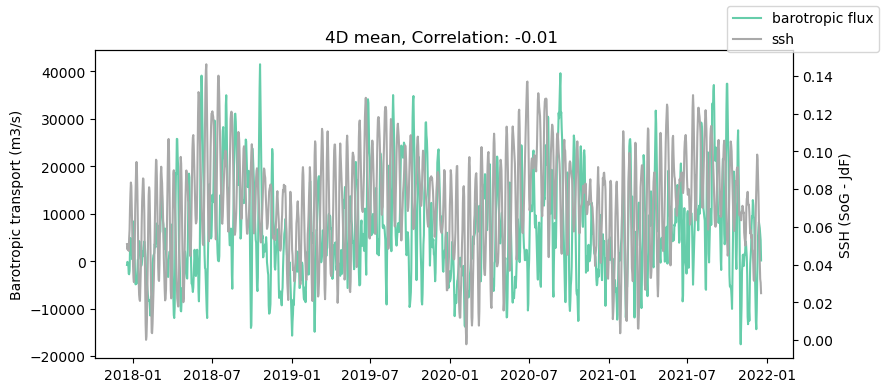

In [195]:
fig,ax = plt.subplots(figsize=(9,4))

plt.plot(date_DD_haro_btrop,haro_btrop,color='mediumaquamarine',zorder=2,label='barotropic flux')
ax2=ax.twinx()
ax2.plot(date_DD_haro_btrop,ssh_sh,color='darkgrey',zorder=1,label='ssh')
ax.set_ylabel('Barotropic transport (m3/s)')
ax2.set_ylabel('SSH (SoG - JdF)')
ax.set_title(f'4D mean, Correlation: {np.round(corr,2)} ')
fig.legend()

Looks strong but correlation coefficient is small? -> Long term trend but not short term

In [196]:
mask = np.isin(datelist_ssh,date_haro_btrop)
ssh_30D_short = ssh_30D[mask]

corr_30D = stats.spearmanr(haro_btrop,ssh_30D_short)[0]

Text(0.5, 1.0, '30D mean, Correlation: 0.41 ')

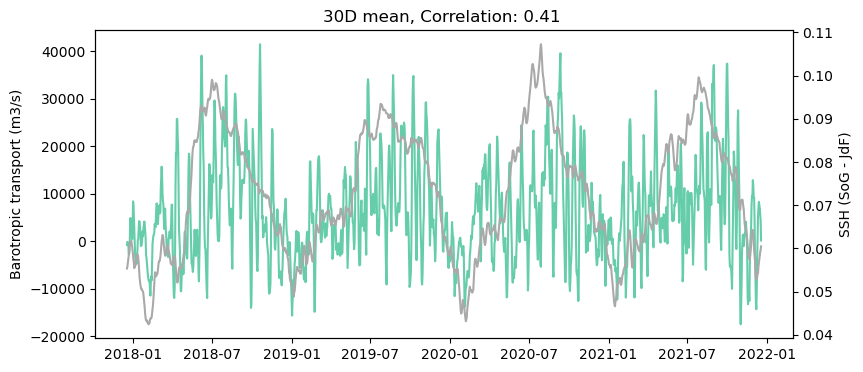

In [197]:
fig,ax = plt.subplots(figsize=(9,4))

plt.plot(date_DD_haro_btrop,haro_btrop,color='mediumaquamarine',zorder=2,label='barotropic flux')
ax2=ax.twinx()
ax2.plot(date_DD_haro_btrop,ssh_30D_short,color='darkgrey',zorder=1,label='ssh')
ax.set_ylabel('Barotropic transport (m3/s)')
ax2.set_ylabel('SSH (SoG - JdF)')
ax.set_title(f'30D mean, Correlation: {np.round(corr_30D,2)} ')

### Look at scaled correlation coefficient (Nikolić et al. 2012)

In [198]:
def scaled_correlation(a, b, scale):
    sum_correlations = 0
    count = 0
    for i in range(len(a)//scale):
        r, _ = stats.pearsonr(
            a[i * scale: (i + 1) * scale],
            b[i * scale: (i + 1) * scale]
        )
        sum_correlations += r
        count += 1
    return sum_correlations/count

In [199]:
x = tides_haro_btrop
x = ssh_sh
y = haro_btrop.values
nansInArray = (np.isnan(y) | np.isnan(x))
print (np.corrcoef(x[~nansInArray], y[~nansInArray]))

[[1.         0.00647599]
 [0.00647599 1.        ]]


In [200]:
xmin = 0
sum = 0
icount = 0
corr_all = np.zeros(299)

for scale in range(2, 300):
    nums = np.zeros(299)
    for shift in range(scale):
        corr = scaled_correlation(x[~nansInArray][shift:], y[~nansInArray][shift:], scale)
        nums[shift] = corr
    
    corr_all[scale-2] = min(nums)
    # print(scale,min(nums))


KeyboardInterrupt: 

Text(0.5, 0, 'Window size')

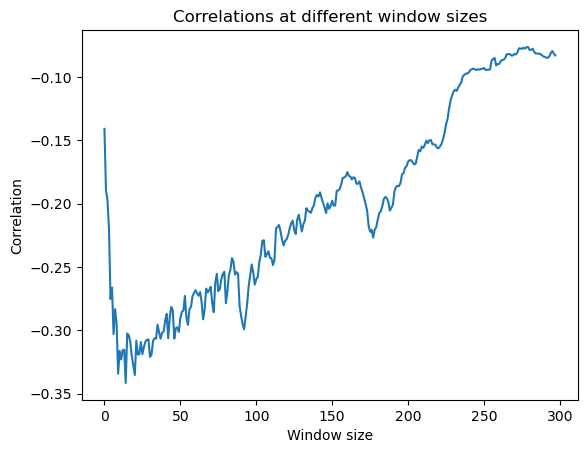

In [ ]:
plt.plot(corr_all[0:298])
plt.title('Correlations at different window sizes')
plt.ylabel('Correlation')
plt.xlabel('Window size')

In [ ]:
xmin = 0
sum = 0
icount = 0

for scale in range(16, 17):
    for shift in range(scale):
        correl = scaled_correlation(x[~nansInArray][shift:], y[~nansInArray][shift:], scale)
        print(scale, shift, correl)
        xmin = correl
        if scale == 20:
#            print (shift, correl)
            sum = sum + correl
            icount = icount + 1
# print (sum/icount)

16 0 -0.30212364743269404
16 1 -0.3176220436016021
16 2 -0.3321236491160279
16 3 -0.3414900190542515
16 4 -0.33397777094430603
16 5 -0.3154769936652452
16 6 -0.2949023556598378
16 7 -0.2763661932347513
16 8 -0.2545041404720196
16 9 -0.24520361605986637
16 10 -0.24680507947316993
16 11 -0.25524230820415617
16 12 -0.27038795734420246
16 13 -0.2793081173189194
16 14 -0.2847876789270742
16 15 -0.2935693183002453


### Make a similar loop but shifting transport from -50 to 50 ....

In [ ]:
xmin = 0
sum = 0
icount = 0
corr_all = np.zeros(100)

x = ssh_sh
y = haro_btrop.values
nansInArray = (np.isnan(y) | np.isnan(x))

for shift in range(1, 100):
    corr,p = stats.spearmanr(ssh_sh[:-shift], haro_btrop[shift:])
    corr_all[shift] = corr


Text(0.5, 1.0, 'Correlation between barotropic flux and ssh')

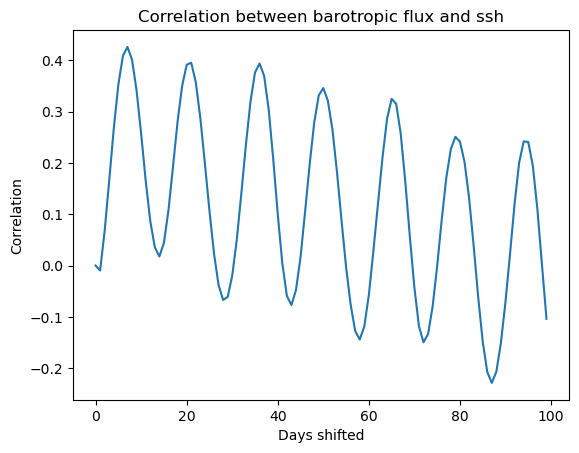

In [ ]:
plt.plot(corr_all)
plt.ylabel('Correlation')
plt.xlabel('Days shifted')
plt.title('Correlation between barotropic flux and ssh')

In [ ]:
haro_btrop_shifted = haro_btrop[7:]
haro_btrop_shifted

Date
2017-12-24    2492.547559
2017-12-25    4887.803325
2017-12-26    3267.730003
2017-12-27    2646.884389
2017-12-28    2225.406472
                 ...     
2021-12-15    7527.924746
2021-12-16    6934.532021
2021-12-17    5634.473298
2021-12-18    4398.383779
2021-12-19     161.500874
Name: Transport, Length: 1456, dtype: float64

In [201]:
ssh_shifted = ssh_sh[:-7]
date_ssh_shifted = date_ssh_haro_btrop[:-7]
corr = stats.spearmanr(ssh_shifted,haro_btrop_shifted)
print(corr)

SignificanceResult(statistic=0.44379091604431065, pvalue=2.6297169368355202e-71)


In [202]:
slope,intercept = np.polyfit(tides_haro_btrop,haro_btrop,1)
res_haro_btrop = np.array(haro_btrop) - (slope*tides_haro_btrop + intercept)

In [203]:
stats.spearmanr(ssh_sh,res_haro_btrop)[0]

-0.01381829439296783

In [204]:
corr = stats.spearmanr(ssh_shifted,res_haro_btrop[7:])[0]

Text(0.5, 1.0, 'Correlation: 0.453')

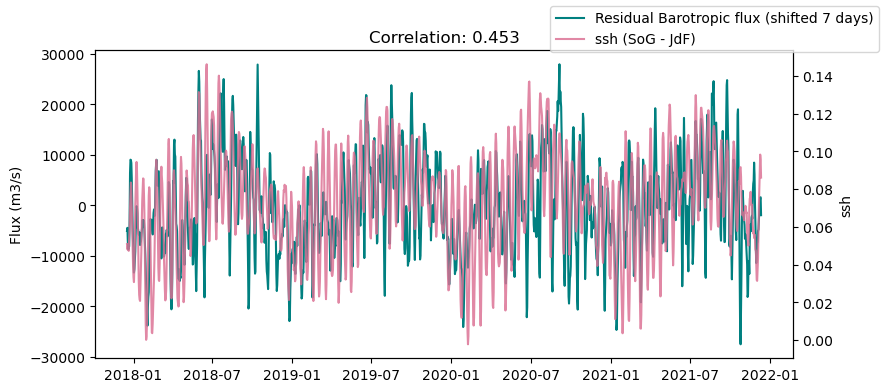

In [205]:
fig,ax = plt.subplots(figsize=(9,4))
plt.plot(date_ssh_shifted,res_haro_btrop[7:],color='teal',label='Residual Barotropic flux (shifted 7 days)')
ax2 = ax.twinx()
ax2.plot(date_ssh_shifted,ssh_shifted,color='palevioletred',alpha=0.83,label='ssh (SoG - JdF)')
fig.legend()
ax.set_ylabel('Flux (m3/s)')
ax2.set_ylabel('ssh')
plt.title(f'Correlation: {np.round(corr,3)}')

Text(0, 0.5, 'ssh')

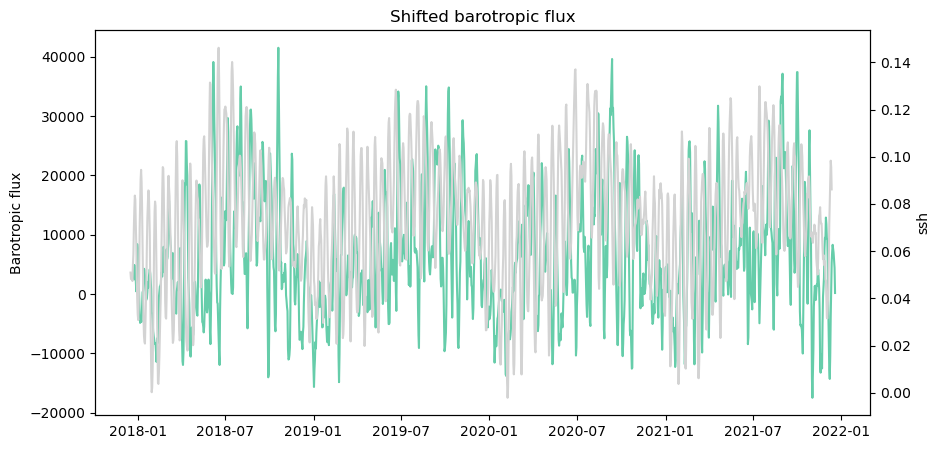

In [206]:
fig,ax = plt.subplots(figsize=(10,5))

ax.plot(haro_btrop_shifted,color='mediumaquamarine')
ax2 = ax.twinx()
ax2.plot(date_ssh_shifted,ssh_shifted,color='lightgrey')
ax.set_title('Shifted barotropic flux')
ax.set_ylabel('Barotropic flux')
ax2.set_ylabel('ssh')

In [207]:
stats.spearmanr(tides_haro_btrop,ssh_sh)

SignificanceResult(statistic=0.004184255646670177, pvalue=0.8729533394948353)

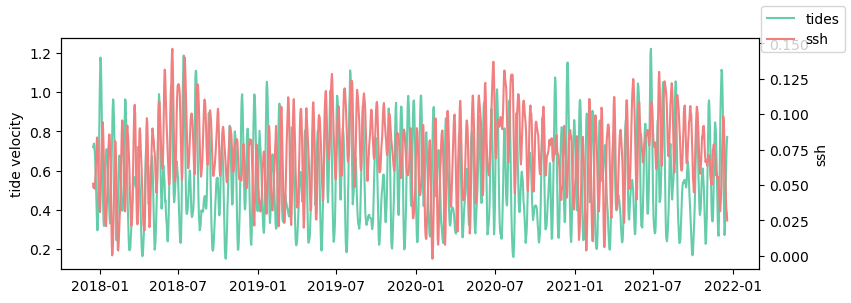

In [208]:
fig,ax = plt.subplots(figsize=(9,3))
plt.plot(date_haro_btrop,tides_haro_btrop,color='mediumaquamarine',label='tides')
ax2=ax.twinx()
ax2.plot(date_haro_btrop,ssh_sh,color='lightcoral',label='ssh')
ax.set_ylabel('tide velocity')
ax2.set_ylabel('ssh')
fig.legend()

In [209]:
xmin = 0
sum = 0
icount = 0
corr_all = np.zeros(100)

for shift in range(1, 100):
    corr,p = stats.spearmanr(ssh_sh[:-shift], tides_haro_btrop[shift:])
    corr_all[shift] = corr

Text(0.5, 0, 'Days shifted')

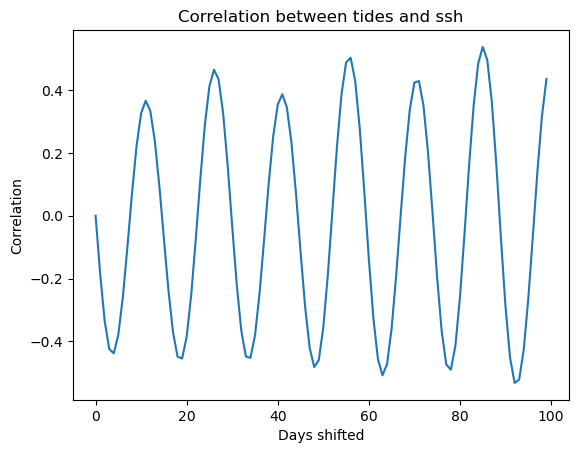

In [210]:
plt.plot(corr_all)
plt.title('Correlation between tides and ssh')
plt.ylabel('Correlation')
plt.xlabel('Days shifted')

In [211]:
mask = np.isin(datelist_ssh,date_haro2018)
ssh_2018 = ssh[mask]
date_ssh_2018 = np.array(datelist_ssh)[mask]
haro_btrop2018_shifted = haro_btrop2018[7:]

corr_ssh = stats.spearmanr(ssh_2018[:-7],haro_btrop2018_shifted)[0]

Text(0.5, 1.0, 'Correlation: 0.516')

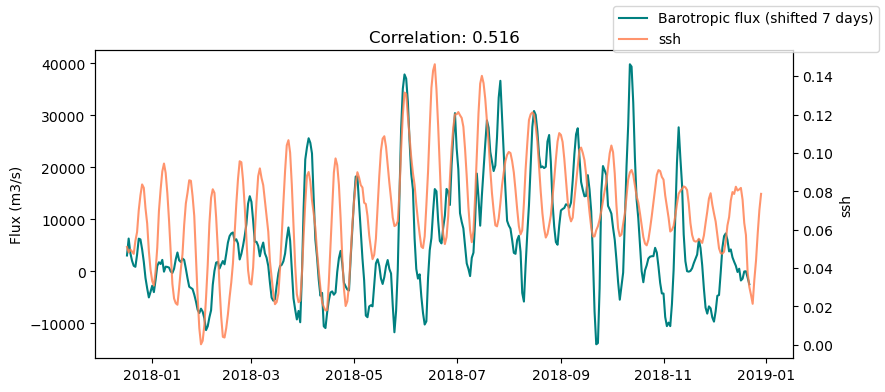

In [212]:
fig,ax = plt.subplots(figsize=(9,4))
plt.plot(date_ssh_2018[:-7],haro_btrop2018_shifted,color='teal',label='Barotropic flux (shifted 7 days)')
ax2 = ax.twinx()
ax2.plot(date_ssh_2018,ssh_2018,color='coral',alpha=0.83,label='ssh')
fig.legend()
ax.set_ylabel('Flux (m3/s)')
ax2.set_ylabel('ssh')
plt.title(f'Correlation: {np.round(corr_ssh,3)}')

In [213]:
slope,intercept = np.polyfit(ssh_sh[:-7],haro_btrop[7:],1)
res_haro_btrop_ssh = np.array(haro_btrop[7:]) - (slope*ssh_sh[:-7] + intercept)

corr_resharo_btrop_tides = stats.spearmanr(tides_haro_btrop[7:],res_haro_btrop_ssh)[0]

Text(0.5, 1.0, 'Correlation: -0.447')

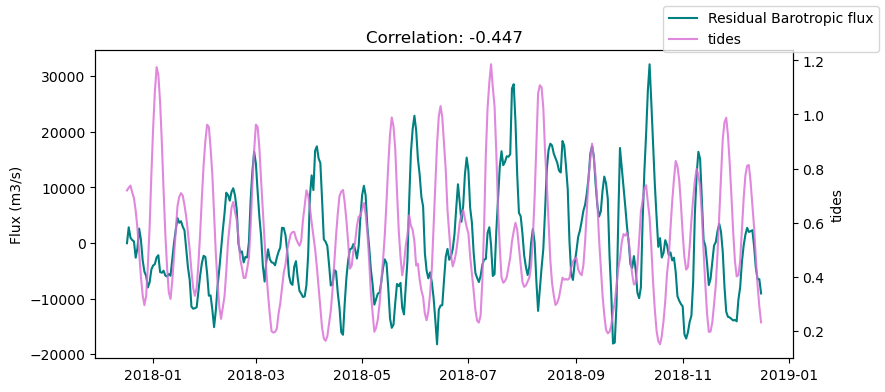

In [214]:
fig,ax = plt.subplots(figsize=(9,4))
plt.plot(date_ssh_shifted[0:365],res_haro_btrop_ssh[0:365],color='teal',label='Residual Barotropic flux') 
ax2 = ax.twinx()
ax2.plot(date_tides_haro_btrop[0:365],tides_haro_btrop[0:365],color='orchid',alpha=0.83,label='tides')
fig.legend()
ax.set_ylabel('Flux (m3/s)')
ax2.set_ylabel('tides')
plt.title(f'Correlation: {np.round(corr_resharo_btrop_tides,3)}')

In [215]:
stats.spearmanr(winds_harobtrop[7:],res_haro_btrop_ssh)

SignificanceResult(statistic=0.1296590007930214, pvalue=6.898794135403718e-07)

In [216]:
stats.spearmanr(densdiff_haro_btrop[:-7],res_haro_btrop_ssh)

SignificanceResult(statistic=0.3682997135745687, pvalue=5.343314139435264e-48)

The response of the barotropic flux lags the change in sea surface height, so the correlation time series is shifted by 7 days.

In [217]:
mask = np.isin(datelist_ssh,date_haro2018)
ssh_2018 = ssh[mask]
date_ssh_2018 = np.array(datelist_ssh)[mask]

corr_ssh2018 = stats.spearmanr(ssh_2018[:-7],haro_btrop2018[7:])[0]
print(corr_ssh2018)

0.5155732638994964


In [218]:
mask = np.isin(datelist_ssh,date_haro2020)
ssh_2020 = ssh[mask]
date_ssh_2020 = np.array(datelist_ssh)[mask]

#ssh 2020
corr_ssh2020 = stats.spearmanr(ssh_2020[:-7],haro_btrop2020[7:])[0]
print(corr_ssh2020)

#ssh all
corr_btrop_ssh = stats.spearmanr(ssh_sh[:-7],haro_btrop[7:])[0]
print(corr_btrop_ssh)

#ssh all, line of best fit
slope,intercept = np.polyfit(ssh_sh[:-7],haro_btrop[7:],1)
res_haro_btrop_ssh = np.array(haro_btrop[7:]) - (slope*ssh_sh[:-7] + intercept)
sshline_harobtrop_plot = slope*np.arange(-0.02,0.17,0.01) + intercept

#2020
slope,intercept = np.polyfit(ssh_2020[:-7],haro_btrop2020[7:],1)
res_haro_btrop_ssh_2020 = np.array(haro_btrop2020[7:]) - (slope*ssh_2020[:-7] + intercept)

#tides residual
corr_resharo_btrop_tides_2020 = stats.spearmanr(tides_haro_btrop2020[7:],res_haro_btrop_ssh_2020)[0]
print(corr_resharo_btrop_tides_2020)
corr_resharo_btrop_tides = stats.spearmanr(tides_haro_btrop[7:],res_haro_btrop_ssh)[0]
print(corr_resharo_btrop_tides)
slope,intercept = np.polyfit(tides_haro_btrop[7:],res_haro_btrop_ssh,1)
tline_btrop = slope*np.arange(0,1.8,0.08)+intercept

#densdiff residual
corr_resharo_btrop_dd_2020 = stats.spearmanr(densdiff_haro_btrop2020[:-7],res_haro_btrop_ssh_2020)[0]
print(corr_resharo_btrop_dd_2020)
corr_resharo_btrop_dd = stats.spearmanr(densdiff_haro_btrop[:-7],res_haro_btrop_ssh)[0]
print(corr_resharo_btrop_dd)
slope,intercept = np.polyfit(densdiff_haro_btrop[:-7],res_haro_btrop_ssh,1)
ddline_btrop = slope*np.arange(0,20,0.5)+intercept


#wind speed residual
corr_resharo_btrop_winds_2020 = stats.spearmanr(np.abs(winds_haro2020[:-7]),res_haro_btrop_ssh_2020)[0]
print(corr_resharo_btrop_winds_2020)
corr_resharo_btrop_winds = stats.spearmanr(np.abs(winds_harobtrop[:-7]),res_haro_btrop_ssh)[0]
print(corr_resharo_btrop_winds)
slope,intercept = np.polyfit(winds_harobtrop[:-7],res_haro_btrop_ssh,1)
wline_btrop = slope*np.arange(0,8,0.5)+intercept

#wind velocity residual
# corr_resharo_btrop_winds_2020 = stats.spearmanr(winds_haro2020[7:],res_haro_btrop_ssh_2020)[0]
# print(corr_resharo_btrop_winds_2020)
# corr_resharo_btrop_winds = stats.spearmanr(winds_harobtrop[7:],res_haro_btrop_ssh)[0]
# print(corr_resharo_btrop_winds)
# slope,intercept = np.polyfit(winds_harobtrop[7:],res_haro_btrop_ssh,1)
# wline_btrop = slope*np.arange(-8,8,0.5)+intercept

0.4162606614121495
0.44379091604431065
-0.42420121435225555
-0.44714142956435765
0.3142405789469871
0.3682997135745687
-0.14051268177642295
-0.1226026303367118


In [219]:
mask = np.isin(datelist_ssh,date_haro2018)
ssh_2018 = ssh[mask]
date_ssh_2018 = np.array(datelist_ssh)[mask]

#2020
slope,intercept = np.polyfit(ssh_2018[:-7],haro_btrop2018[7:],1)
res_haro_btrop_ssh_2018 = np.array(haro_btrop2018[7:]) - (slope*ssh_2018[:-7] + intercept)

#wind velocity residual
corr_resharo_btrop_winds_2018 = stats.spearmanr(np.abs(winds_haro2018[7:]),res_haro_btrop_ssh_2018)[0]
print(corr_resharo_btrop_winds_2018)

-0.039849648796696883


In [220]:
mask = np.isin(datelist_ssh,date_haro2019)
ssh_2019 = ssh[mask]
date_ssh_2019 = np.array(datelist_ssh)[mask]

#2019
slope,intercept = np.polyfit(ssh_2019[:-7],haro_btrop2019[7:],1)
res_haro_btrop_ssh_2019 = np.array(haro_btrop2019[7:]) - (slope*ssh_2019[:-7] + intercept)

#wind velocity residual
corr_resharo_btrop_winds_2019 = stats.spearmanr(np.abs(winds_haro2019[7:]),res_haro_btrop_ssh_2019)[0]
print(corr_resharo_btrop_winds_2019)

-0.11333834023974705


/tmp/ipykernel_2700206/3057384016.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax12.set_yticklabels(np.arange(3,12,2),color=color2)
/tmp/ipykernel_2700206/3057384016.py:74: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax32.set_yticklabels(np.arange(0,1.2,0.2),color=color4)


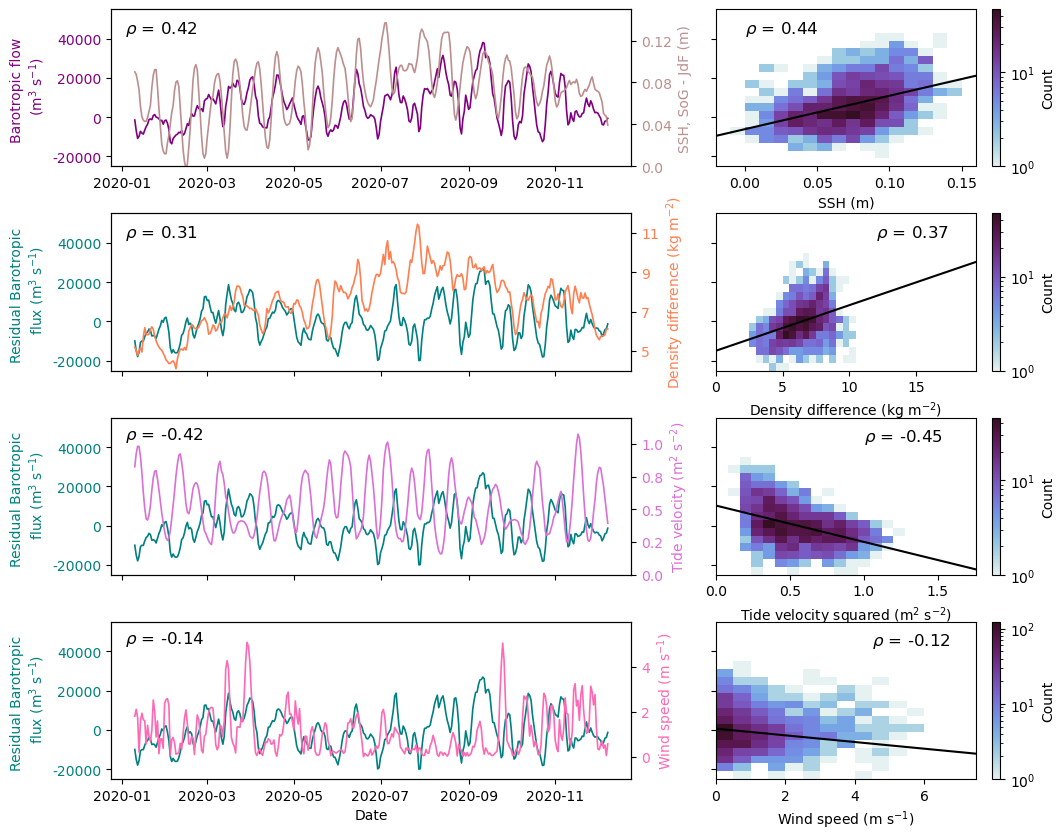

In [221]:
cmap = cm.dense
color7 = 'purple'
color1 = 'teal'
color2 = 'coral'
color3 = 'green'
color4 = 'orchid'

fig,[[ax7,ax8],[ax1,ax2],[ax3,ax4],[ax5,ax6]] = plt.subplots(4,2,figsize=(12,10),gridspec_kw={'width_ratios':[1.6,1]})

ax7.plot(haro_btrop2020[7:],color=color7,lw=1.2)
ax7.set_ylim([-25000,55000])
ax7.set_ylabel(f'Barotropic flow \n (m$^3$ s$^{{-1}}$)',color=color7)
ax7.set_yticks(np.arange(-20000,45000,20000),color=color7)
ax7.set_yticklabels(np.arange(-20000,45000,20000),color=color7)
ax72 = ax7.twinx()
ax72.plot(date_haro2020[7:],ssh_2020[:-7],color='rosybrown',lw=1.2)
ax7.annotate(f'$\\rho$ = {np.round(corr_ssh2020,2)}',(date_haro2020[0],43000),fontsize=12)
ax72.set_ylabel(f'SSH, SoG - JdF (m)',color='rosybrown')
ax72.set_ylim([0,0.15])
ax72.set_yticks(np.arange(0.0,0.16,0.04),color='rosybrown')
ax72.set_yticklabels(np.arange(0.0,0.16,0.04),color='rosybrown')

arr,xe,ye,im = ax8.hist2d(ssh_sh[:-7],haro_btrop[7:],
                          bins=[np.arange(-0.02,0.17,0.01),np.arange(-25000,55000,4000)],
                          norm=LogNorm(),
                          cmap=cmap
                                )
ax8.plot(np.arange(-0.02,0.17,0.01),sshline_harobtrop_plot,color='k')
ax8.set_ylim([-25000,55000])
ax8.set_yticks(np.arange(-20000,45000,20000),color=color1)
ax8.set_yticklabels([])
ax8.set_xlabel(f'SSH (m)')
ax8.annotate(f'$\\rho$ = {np.round(corr_btrop_ssh,2)}',(0,43000),fontsize=12)
cb = fig.colorbar(im,ax=ax8)
cb.set_label('Count')

ax1.plot(date_haro2020[7:],res_haro_btrop_ssh_2020,color=color1,lw=1.2)
ax1.set_xticklabels([])
ax12 = ax1.twinx()
ax12.plot(date_haro2020[7:],densdiff_haro_btrop2020[:-7],color=color2,lw=1.2)
ax1.set_ylim([-25000,55000])
ax1.set_ylabel(f'Residual Barotropic \n flux (m$^3$ s$^{{-1}}$)',color=color1)
ax1.set_yticks(np.arange(-20000,45000,20000),color=color1)
ax1.set_yticklabels(np.arange(-20000,45000,20000),color=color1)
ax12.set_ylabel(f'Density difference (kg m$^{{-2}}$)',color=color2)
ax12.set_ylim([3,11])
ax12.set_yticklabels(np.arange(3,12,2),color=color2)
ax1.annotate(f'$\\rho$ = {np.round(corr_resharo_btrop_dd_2020,2)}',(date_haro2020[0],43000),fontsize=12)

arr,xe,ye,im = ax2.hist2d(densdiff_haro_btrop[:-7],res_haro_btrop_ssh,
                          bins=[np.arange(0,20,0.5),np.arange(-25000,55000,4000)],
                          norm=LogNorm(),
                          cmap=cmap
                                )
# ax2.scatter(densdiff_haro_btrop,haro_btrop,color='indigo')
ax2.plot(np.arange(0,20,0.5),ddline_btrop,color='k')
ax2.set_ylim([-25000,55000])
ax2.set_yticks(np.arange(-20000,45000,20000),color=color1)
ax2.set_yticklabels([])
ax2.set_xlabel(f'Density difference (kg m$^{{-2}}$)')
ax2.annotate(f'$\\rho$ = {np.round(corr_resharo_btrop_dd,2)}',(12,43000),fontsize=12)
cb = fig.colorbar(im,ax=ax2)
cb.set_label('Count')

ax3.plot(date_haro2020[7:],res_haro_btrop_ssh_2020,color=color1,lw=1.2)
ax32 = ax3.twinx()
ax32.plot(date_haro2020[7:],tides_haro_btrop2020[7:],color=color4,lw=1.2)
ax3.set_ylim([-25000,55000])
ax3.set_ylabel(f'Residual Barotropic \n flux (m$^3$ s$^{{-1}}$)',color=color1)
ax32.set_ylabel(f'Tide velocity (m$^2$ s$^{{-2}}$)',color=color4)
ax3.set_yticks(np.arange(-20000,45000,20000),color=color1)
ax3.set_yticklabels(np.arange(-20000,45000,20000),color=color1)
ax32.set_ylim([0,1.2])
ax32.set_yticklabels(np.arange(0,1.2,0.2),color=color4)
ax32.yaxis.set_major_formatter(StrMethodFormatter(f'{{x:.{1}f}}'))
ax3.annotate(f'$\\rho$ = {np.round(corr_resharo_btrop_tides_2020,2)}',(date_haro2020[0],44000),fontsize=12)
ax3.set_xticklabels([])

arr,xe,ye,im = ax4.hist2d(tides_haro_btrop[7:],res_haro_btrop_ssh,
                          bins=[np.arange(0,1.8,0.08),np.arange(-25000,55000,4000)],
                          norm=LogNorm(),
                          cmap=cmap
                                )
# ax4.scatter(tides_haro_btrop,haro_btrop,color='indigo')
ax4.plot(np.arange(0,1.8,0.08),tline_btrop,color='k')
ax4.set_ylim([-25000,55000])
ax4.set_yticks(np.arange(-20000,45000,20000),color=color1)
ax4.set_yticklabels([])
ax4.set_xlabel(f'Tide velocity squared (m$^2$ s$^{{-2}}$)')
ax4.annotate(f'$\\rho$ = {np.round(corr_resharo_btrop_tides,2)}',(1,43000),fontsize=12)
cb = fig.colorbar(im,ax=ax4)
cb.set_label('Count')

fig.subplots_adjust(wspace=0.2,hspace=0.3);

ax5.plot(date_haro2020[7:],res_haro_btrop_ssh_2020,color=color1,lw=1.2)
ax5.set_ylabel(f'Residual Barotropic \n flux (m$^3$ s$^{{-1}}$)',color=color1)
ax5.set_ylim([-25000,55000])
ax5.set_yticks(np.arange(-20000,45000,20000),color=color1)
ax5.set_yticklabels(np.arange(-20000,45000,20000),color=color1)
ax52 = ax5.twinx()
ax52.plot(date_haro2020[7:],np.abs(winds_haro2020[7:]),color='hotpink',lw=1.2)
ax52.set_ylim([-1,6])
ax52.set_yticks(np.arange(0,6,2),color='hotpink')
ax52.set_yticklabels(np.arange(0,6,2),color='hotpink')
ax52.set_ylabel(f'Wind speed (m s$^{{-1}}$)' ,color='hotpink')
ax5.annotate(f'$\\rho$ = {np.round(corr_resharo_btrop_winds_2020,2)}',(date_haro2020[0],44000),fontsize=12)
ax5.set_xlabel('Date')

arr,xe,ye,im = ax6.hist2d(np.abs(winds_harobtrop[7:]),res_haro_btrop_ssh,
                          bins=[np.arange(0,8,0.5),np.arange(-25000,55000,4000)],
                          norm=LogNorm(),
                          cmap=cmap
                                )
# ax6.scatter(np.abs(winds_harobtrop),haro_btrop,color='indigo')
ax6.plot(np.arange(0,8,0.5),wline_btrop,color='k')
ax6.set_ylim([-25000,55000])
ax2.set_yticks(np.arange(-20000,45000,20000),color=color1)
ax6.set_yticklabels([])
ax6.set_xlabel(f'Wind speed (m s$^{{-1}}$)')
ax6.annotate(f'$\\rho$ = {np.round(corr_resharo_btrop_winds,2)}',(4.5,43000),fontsize=12)
cb = fig.colorbar(im,ax=ax6)
cb.set_label('Count');

# Multiple linear regression

In [222]:
tides_btrop_notshifted = tides_haro_btrop[7:].values
ssh_shifted = ssh_sh[:-7].values
densdiff_btrop_shifted = densdiff_haro_btrop[:-7]
wind_vel_btrop_notshifted = winds_harobtrop[7:]
wind_speed_btrop_notshifted = np.abs(winds_harobtrop[7:])

densdiff_btrop_notshifted = densdiff_haro_btrop[7:]
wind_vel_btrop_shifted = winds_harobtrop[:-7]
wind_speed_btrop_shifted = np.abs(winds_harobtrop[:-7])

### Tides and SSH

In [223]:
from sklearn.linear_model import LinearRegression
import pandas as pd

In [259]:
X1 = pd.DataFrame({
    'tides': tides_btrop_notshifted,
    'ssh': ssh_shifted
})

y = haro_btrop_shifted

# Fit the model
model1 = LinearRegression()
model1.fit(X1, y)

# R-squared (variance explained)
r_squared1 = model1.score(X1, y)

print("R-squared:", r_squared1)
print("Intercept:", model1.intercept_)
print("Coefficients:", model1.coef_)


R-squared: 0.35222345507403197
Intercept: 4715.997206112788
Coefficients: [-18520.31950999 162758.25538038]


In [260]:
refit1 = model1.coef_[0]*X1.tides + model1.coef_[1]*X1.ssh + model1.intercept_

Text(0.5, 1.0, 'MLR, R2 = 0.35')

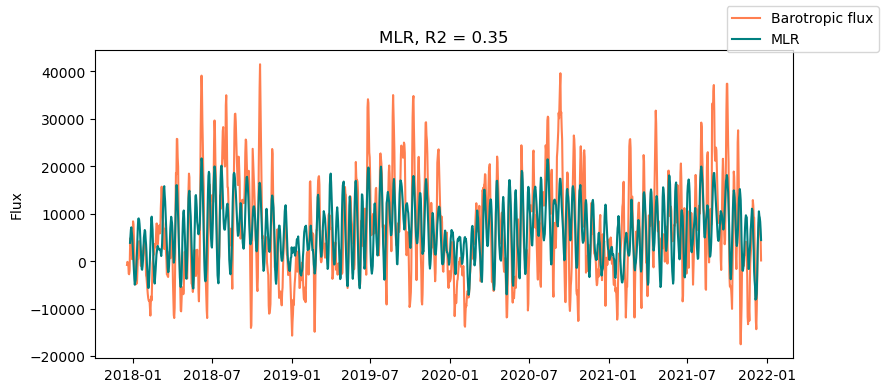

In [230]:
fig,ax = plt.subplots(figsize=(9,4))
plt.plot(date_haro_btrop,haro_btrop,color='coral',label='Barotropic flux')
plt.plot(date_haro_btrop[7:],refit1,color='teal',label='MLR')
fig.legend()
plt.ylabel('Flux')
plt.title(f'MLR, R2 = {np.round(r_squared1,2)}')

In [261]:
print(f'ρ (flux, refit) = ',stats.spearmanr(refit1,y)[0])

ρ (flux, refit) =  0.5640948961813752


### With density difference(shifted) and wind vel (not shifted)

In [263]:
# Create DataFrame for predictors (X) and target (y)
X2 = pd.DataFrame({
    'tides': tides_btrop_notshifted,
    'ssh': ssh_shifted,
    'densdiff': densdiff_btrop_shifted,
    'wind_velocity':wind_vel_btrop_notshifted
})

y = haro_btrop[7:]

# Fit the model
model2 = LinearRegression()
model2.fit(X2, y)

# R-squared (variance explained)
r_squared2 = model2.score(X2, y)

print("R-squared:", r_squared2)
print("Intercept:", model2.intercept_)
print("Coefficients:", model2.coef_)


R-squared: 0.46941113131299117
Intercept: -9746.853364686864
Coefficients: [-15835.9176567   75195.47214863   2968.52761713    714.33154043]


In [264]:
refit2 = model2.coef_[0]*X2.tides + model2.coef_[1]*X2.ssh + model2.coef_[2]*X2.densdiff + model2.coef_[3]*X2.wind_velocity + model2.intercept_

print(f'ρ (flux, refit) = ',stats.spearmanr(refit2,haro_btrop_shifted)[0])

ρ (flux, refit) =  0.6851686723652137


### Now wind speed (not shifted)

In [265]:
# Create DataFrame for predictors (X) and target (y)
X3 = pd.DataFrame({
    'tides': tides_btrop_notshifted,
    'ssh': ssh_shifted,
    'densdiff': densdiff_btrop_shifted,
    'wind_speed':wind_speed_btrop_notshifted
})

y = haro_btrop[7:]

# Fit the model
model3 = LinearRegression()
model3.fit(X3, y)

# R-squared (variance explained)
r_squared3 = model3.score(X3, y)

print("R-squared:", r_squared3)
print("Intercept:", model3.intercept_)
print("Coefficients:", model3.coef_)


R-squared: 0.4618704138663624
Intercept: -10346.064326017391
Coefficients: [-15849.37630402  75677.6251794    3025.6377158     477.076942  ]


In [266]:
refit3 = model3.coef_[0]*X3.tides + model3.coef_[1]*X3.ssh + model3.coef_[2]*X3.densdiff + model3.coef_[3]*X3.wind_speed + model3.intercept_

print(f'ρ (flux, refit) = ',stats.spearmanr(refit3,haro_btrop_shifted)[0])

ρ (flux, refit) =  0.6779833921924364


### Now wind velocity (shifted)

In [249]:
# Create DataFrame for predictors (X) and target (y)
X4 = pd.DataFrame({
    'tides': tides_btrop_notshifted,
    'ssh': ssh_shifted,
    'densdiff': densdiff_btrop_shifted,
    'wind_velocity':wind_vel_btrop_shifted
})

y = haro_btrop[7:]

# Fit the model
model4 = LinearRegression()
model4.fit(X4, y)

# R-squared (variance explained)
r_squared4 = model4.score(X4, y)

print("R-squared:", r_squared4)
print("Intercept:", model4.intercept_)
print("Coefficients:", model4.coef_)


R-squared: 0.4721171865484871
Intercept: -7408.086714134977
Coefficients: [-16007.82490611  86364.95247758   2592.68245384   -852.70685394]


In [251]:
refit4 = model4.coef_[0]*X4.tides + model4.coef_[1]*X4.ssh + model4.coef_[2]*X4.densdiff + model4.coef_[3]*X4.wind_velocity + model4.intercept_

print('ρ (flux, refit) = ',stats.spearmanr(refit4,haro_btrop_shifted)[0])

ρ (flux, refit) =  0.6851654688666201


### Now density difference (not shifted)

In [267]:
# Create DataFrame for predictors (X) and target (y)
X5 = pd.DataFrame({
    'tides': tides_btrop_notshifted,
    'ssh': ssh_shifted,
    'densdiff': densdiff_btrop_notshifted,
    'wind_velocity':wind_vel_btrop_shifted
})

y = haro_btrop[7:]

# Fit the model
model5 = LinearRegression()
model5.fit(X5, y)

# R-squared (variance explained)
r_squared5 = model5.score(X5, y)

print("R-squared:", r_squared5)
print("Intercept:", model5.intercept_)
print("Coefficients:", model5.coef_)


R-squared: 0.4035568988332813
Intercept: 1987.0735440524923
Coefficients: [-18597.28181551 151842.84482115    647.49302993  -1443.2778043 ]


In [268]:
refit5 = model5.coef_[0]*X5.tides + model5.coef_[1]*X5.ssh + model5.coef_[2]*X5.densdiff + model5.coef_[3]*X5.wind_velocity + model5.intercept_

print(f'ρ (flux, refit) = ',stats.spearmanr(refit5,haro_btrop_shifted)[0])

ρ (flux, refit) =  0.6106145865399097


### Check MLR with baroclinic flux

In [269]:
# Create DataFrame for predictors (X) and target (y)
X_bclin = pd.DataFrame({
    'tides': tides_haro_bclin,
    'ssh': ssh_sh.values,
    'densdiff': densdiff_haro_bclin,
    'wind_velocity':winds_haro_bclin
})

y = haro_bclin

# Fit the model
model_bclin = LinearRegression()
model_bclin.fit(X_bclin, y)

# R-squared (variance explained)
r_squared_bclin = model_bclin.score(X_bclin, y)

print("R-squared:", r_squared_bclin)
print("Intercept:", model_bclin.intercept_)
print("Coefficients:", model_bclin.coef_)


R-squared: 0.7408006969206554
Intercept: 15815.368778685843
Coefficients: [-37194.27197801 -71911.5145866    9602.77317805    454.1892367 ]


In [270]:
refit_bclin = model_bclin.coef_[0]*X_bclin.tides + model_bclin.coef_[1]*X_bclin.ssh + model_bclin.coef_[2]*X_bclin.densdiff + model_bclin.coef_[3]*X_bclin.wind_velocity + model_bclin.intercept_

print(f'ρ (flux, refit) = ',stats.spearmanr(refit_bclin,haro_bclin)[0])

ρ (flux, refit) =  0.8823615099816695
